<a href="https://colab.research.google.com/github/SeniyaSultan/Plastic-Pollution-Clustering---Unsupervised/blob/main/Plastic_Pollution_Clustering_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import requests
import io


In [ ]:
# Use the file ID from the link
file_id = "1zIk9JOdJEu9YF7Xuv2C8f2Q8ySfG3nHd"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Fetch and load data
response = requests.get(download_url)
data = pd.read_csv(io.StringIO(response.text))

# Preview
data.head()


,Country or Administrative area,Area [km2],Coast length [km],Rainfall [mm year -1],Factor L/A [-],Factor (L/A) *P [-],P[E] [%],MPW (metric tons year -1),M[E] (metric tons year -1),Ratio Me/MPW,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Albania,28'486,362,1'117,0.0100,14.0,1.56%,69'833,1'565,2.24%,NaN,NaN,NaN,NaN
1,Algeria,2'316'559,998,80,0.0004,0.0,0.09%,764'578,5'774,0.76%,NaN,NaN,NaN,NaN
2,Angola,1'247'357,1'600,1'025,0.0010,1.0,0.09%,236'946,860,0.36%,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,443,153,996,0.3000,344.0,3.08%,627,2,0.29%,NaN,NaN,NaN,NaN
4,Argentina,2'779'705,4'989,567,0.0020,1.0,0.26%,465'808,4'137,0.89%,NaN,NaN,NaN,NaN


In [ ]:
print(data_clean.columns)


Index(['Country or Administrative area', 'Area [km2]', 'Coast length [km]',
       'Rainfall [mm year -1]', 'Factor L/A [-]', 'Factor (L/A) *P [-]',
       'P[E] [%]', 'MPW (metric tons year -1)', 'M[E] (metric tons year -1)',
       'Ratio Me/MPW', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')


In [ ]:
features = [
    'Area [km2]',
    'Coast length [km]',
    'Rainfall [mm year -1]',
    'MPW (metric tons year -1)',
    'M[E] (metric tons year -1)'
]


In [ ]:
print("Original rows:", data.shape[0])
print("After dropna:", data_clean.shape[0])


Original rows: 165
After dropna: 0


In [ ]:
# Make a full copy before modifying to avoid warnings
data_clean = data.dropna(subset=features).copy()

# Clean and convert strings to numeric for each feature
for col in features:
    data_clean[col] = data_clean[col].astype(str).str.replace("'", "", regex=False)
    data_clean[col] = data_clean[col].str.replace(",", "", regex=False)
    data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce')

# Drop rows with NaNs after conversion
data_clean = data_clean.dropna(subset=features)


In [ ]:
X = data_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data_clean['Cluster'] = clusters


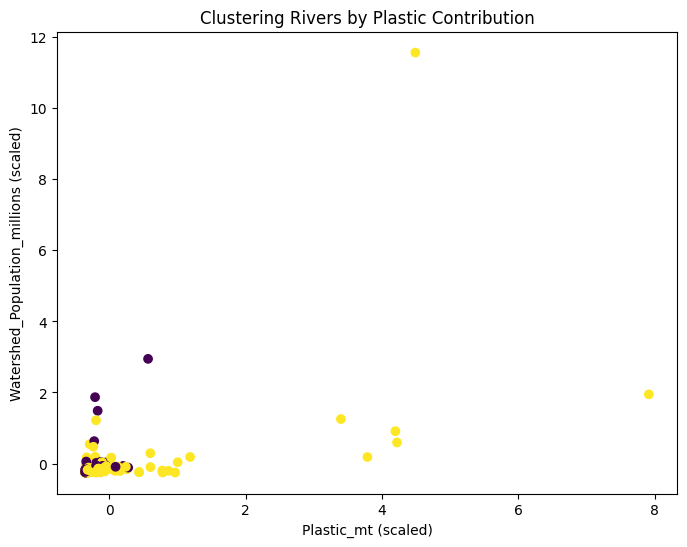

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Plastic_mt (scaled)')
plt.ylabel('Watershed_Population_millions (scaled)')
plt.title('Clustering Rivers by Plastic Contribution')
plt.show()


In [ ]:
df_clean['Cluster'] = kmeans.labels_


NameError: name 'df_clean' is not defined